# Foundations of Artificial Intelligence Project

## Video Lectures Dataset

This coursework works with a collection of video lectures. Different characteristics identified from the meta data, video data and transcripts of the lectures are included in the `lectures_dataset.csv` dataset.

In [ ]:
# Import Librarys

import pandas as pd
import numpy as np
from IPython.display import display
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

data_path = local_path+"lectures_dataset.csv"
lectures = pd.read_csv(data_path)

- The dataset contains 11,548 observations 21 potential features and 1 label column. The label we are aiming to predict is `median_engagement` which can take a value between 0 and 1 where values close to 0 exhibit low engagement and values close to 1 indicate high engagement.  

### Description of Columns

The following table describes the columns in the dataset.

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | Fraction of auxiliary verbs in the transcript |
| conjugate_rate             | Fraction of conjugates in the transcript |
| normalization_rate         | Fraction of normalisation suffixes used in the transcript |
| tobe_verb_rate             | Fraction of to-be-verbs in the transcript |
| preposition_rate           | Fraction of prepositions in the transcript |
| pronoun_rate               | Fraction of pronouns words in the transcript |
| document_entropy           | Document entropy computed using word counts (Topic coherence) |
| easiness                   | The reading level of the transcript (level of English) |
| fraction_stopword_coverage | Fraction of unique stopwords used in the transcript |
| fraction_stopword_presence | Fraction of stopwords in the transcript |
| subject_domain             | If the subject belongs to STEM or not. |
| freshness                  | How recently the video published |
| title_word_count           | Number of words in the title |
| word_count                 | Number of words in the transcript |
| most_covered_topic         | The Wikipedia URL of the most covered topic |
| topic_coverage             | To what degree is the most covered topic covered |
| duration                   | Duration of the video |
| lecture_type               | Type of lecture (e.g. lecture, tutorial, debate, discussion etc.) |
| has_parts                  | If the lecture is broken into multiple videos |
| speaker_speed              | The word rate of the speaker (words per minute) |
| silent_period_rate         | Fraction of Silence in the transcript where words are not spoken |
| median_engagement          | Median % of video watched by all the viewers who watched it |

# Part 1: Exploratory Data Analysis and Feature Extraction (30 Marks)

This section attempts to understand the dataset before we jump into building a machine learning model.

## Dataset Datatypes

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | **Continuous** |
| conjugate_rate             | **Continuous** |
| normalization_rate         | **Continuous** |
| tobe_verb_rate             | **Continuous** |
| preposition_rate           | **Continuous** |
| pronoun_rate               | **Continuous** |
| document_entropy           | **Continuous** |
| easiness                   | **Continuous** |
| fraction_stopword_coverage | **Continuous** |
| fraction_stopword_presence | **Continuous** |
| subject_domain             | **Categorical** |
| freshness                  | **Continuous** |
| title_word_count           | **Discrete** |
| word_count                 | **Discrete** |
| most_covered_topic         | **Categorical** |
| topic_coverage             | **Continuous** |
| duration                   | **Continuous** |
| lecture_type               | **Categorical** |
| has_parts                  | **Categorical** |
| speaker_speed              | **Continuous** |
| silent_period_rate         | **Continuous** |
| median_engagement          | **Continuous** |

In [ ]:
# Visualize first five rows of dataset

lectures.head()

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.0,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.0,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.0,0.041627
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,9,2869,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,1270,vl,False,2.259055,0.0,0.064989
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,9,4840,http://en.wikipedia.org/wiki/Transport,0.414219,2000,vkn,False,2.420000,0.0,0.052154


In [ ]:
# Get dataset datatypes

lectures.dtypes

,0
auxiliary_rate,float64
conjugate_rate,float64
normalization_rate,float64
tobe_verb_rate,float64
preposition_rate,float64
pronoun_rate,float64
document_entropy,float64
easiness,float64
fraction_stopword_coverage,float64
fraction_stopword_presence,float64


## Exploratory Data Analysis

#### Analyses to be carried out with justification
1. **Introductory Descriptive Analysis**

  The goal of this analysis is to establish basic features of the dataframe to gain a surface-level understanding of the dataset. This involves getting the shape of the dataframe (number of rows and columns), using the "describe" function to get measures of central tendency for both numeric variables and categorical variables, and visualizing the top 5 rows of the dataset. Understanding these attributes will enable and guide further exploratory analysis.
2. **Missing Values Analysis**

  Next, I perform a simple analysis of the missing values in the dataset. I use the missingno package to help visualize a sample of the rows to get an idea of which variables have missing observations. I also calculate the exact percentage of missing values in each column. This information is important because missing data must be handled before any modeling is performed.
3. **Numeric Variable Analysis**

  Two of the assumptions of linear regression models are 1. that the dependent variables have a linear relationship with the target variable and 2. that the residuals are normally distributed. The distribution of the numeric variables can impact both of these assumptions, so it is essential to explore their distributions to understand what transformations need to be performed in order to perform a valid linear regression. I visualize the distribution of the variables through a series of histograms and visualize the linear relationship of each numeric variable with the target variable "median_engagement" through a series of regplots. The regplots perform a simple linear regression for each variable and plot a line to show best fit, indicating whether or not there is a linear relationship. I also construct a series of boxplots for each variable to visualize the presence and significance of outliers.

  Due to the extremely high cardinality of the most_covered_topic variable as seen in my first analysis (2096 unique categories), I will use frequency encoding to treat the variable as a numeric variable for visualization. I will expand on why I chose this encoding technique in the data preprocessing section.

  It is important to note here that I split my numeric variables into continuous and discrete sets for visualizing the relationship with the response variable. For continuous variables, I use the regplot method as described above whereas for discrete variables I use boxplots to understand the relationship with the response variable. However, I treat word count as a continuous variable due to its high-cardinality unlike title_word_count and my frequency encoded variable for most_covered_topic which both have low enough cardinality to motivate boxplots.

4. **Categorical Variable Analysis**

  Next, I explore the same assumptions as my numeric analysis but do so for my categorical variables. In the categorical case, we investigate class distribution in order to determine whether there is class imbalance, which could cause models to struggle to make meaning out of categories. I also explore whether or not there is a relationship between the classes of my categorical variables and the value of the dependent variable to understand whether the independent variables will be good predictors of the target variable. I visualize the categorical variable distribution with a series of bar plots and then the relationship with the target variable through a series of box plots.

5. **Correlation Analysis**

  A third assumption of multiple linear regression is that there is no multicollinearity, meaning variables in the dataset should not be highly correlated. To investigate whether the numeric variables in the dataset are linearly correlated, I create a heatmap to display the pairwise correlations for each pair of variables (excluding the target variable).
  

#### 1: Introductory Descriptive Analysis

In [ ]:
print(f"Total # of rows: {lectures.shape[0]}")
print(f"Total # of columns: {lectures.shape[1]}")
print("Numeric Data Description:")
display(round(lectures.describe(),2))
print("Categorical Data Description:")
display(lectures.describe(include=object))
print("Dataframe Header:")
display(lectures.head())

Total # of rows: 11548
Total # of columns: 22
Numeric Data Description:


,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,freshness,title_word_count,word_count,topic_coverage,duration,speaker_speed,silent_period_rate,median_engagement
count,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00,11548.00
mean,0.02,0.04,0.02,0.04,0.12,0.12,7.79,84.73,0.49,0.61,14819.08,7.71,5347.89,0.32,2137.06,2.50,0.15,0.12
std,0.01,0.01,0.01,0.01,0.02,0.03,0.70,8.33,0.14,0.05,1204.58,3.78,5413.87,0.08,1540.86,8.34,0.17,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.21,0.00,0.00,10830.00,1.00,1.00,0.00,20.00,0.00,0.00,0.00
25%,0.01,0.03,0.01,0.04,0.11,0.11,7.59,80.35,0.41,0.59,14070.00,5.00,2102.00,0.27,1020.00,1.97,0.00,0.03
50%,0.02,0.04,0.02,0.04,0.12,0.12,7.88,84.43,0.50,0.61,14750.00,7.00,3642.50,0.32,1630.00,2.27,0.10,0.06
75%,0.02,0.04,0.03,0.05,0.13,0.14,8.16,88.38,0.61,0.63,15600.00,10.00,7188.00,0.37,3050.00,2.54,0.25,0.13
max,0.07,0.49,0.10,0.17,0.32,0.95,9.28,122.03,0.81,1.00,17430.00,33.00,61653.00,0.71,42520.00,881.00,1.54,1.00


Categorical Data Description:


,subject_domain,most_covered_topic,lecture_type,has_parts
count,5913,11548,11548,9396
unique,3,2096,17,2
top,stem,http://en.wikipedia.org/wiki/Time,vl,False
freq,3758,1006,8908,8976


Dataframe Header:


,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.0,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.0,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.0,0.041627
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,9,2869,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,1270,vl,False,2.259055,0.0,0.064989
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,9,4840,http://en.wikipedia.org/wiki/Transport,0.414219,2000,vkn,False,2.420000,0.0,0.052154


#### 2: Missing Values Analysis

In [ ]:
# Get percentage of missing values

round(lectures.isnull().sum()/lectures.shape[0],2)

,0
auxiliary_rate,0.00
conjugate_rate,0.00
normalization_rate,0.00
tobe_verb_rate,0.00
preposition_rate,0.00
pronoun_rate,0.00
document_entropy,0.00
easiness,0.00
fraction_stopword_coverage,0.00
fraction_stopword_presence,0.00


<Axes: >

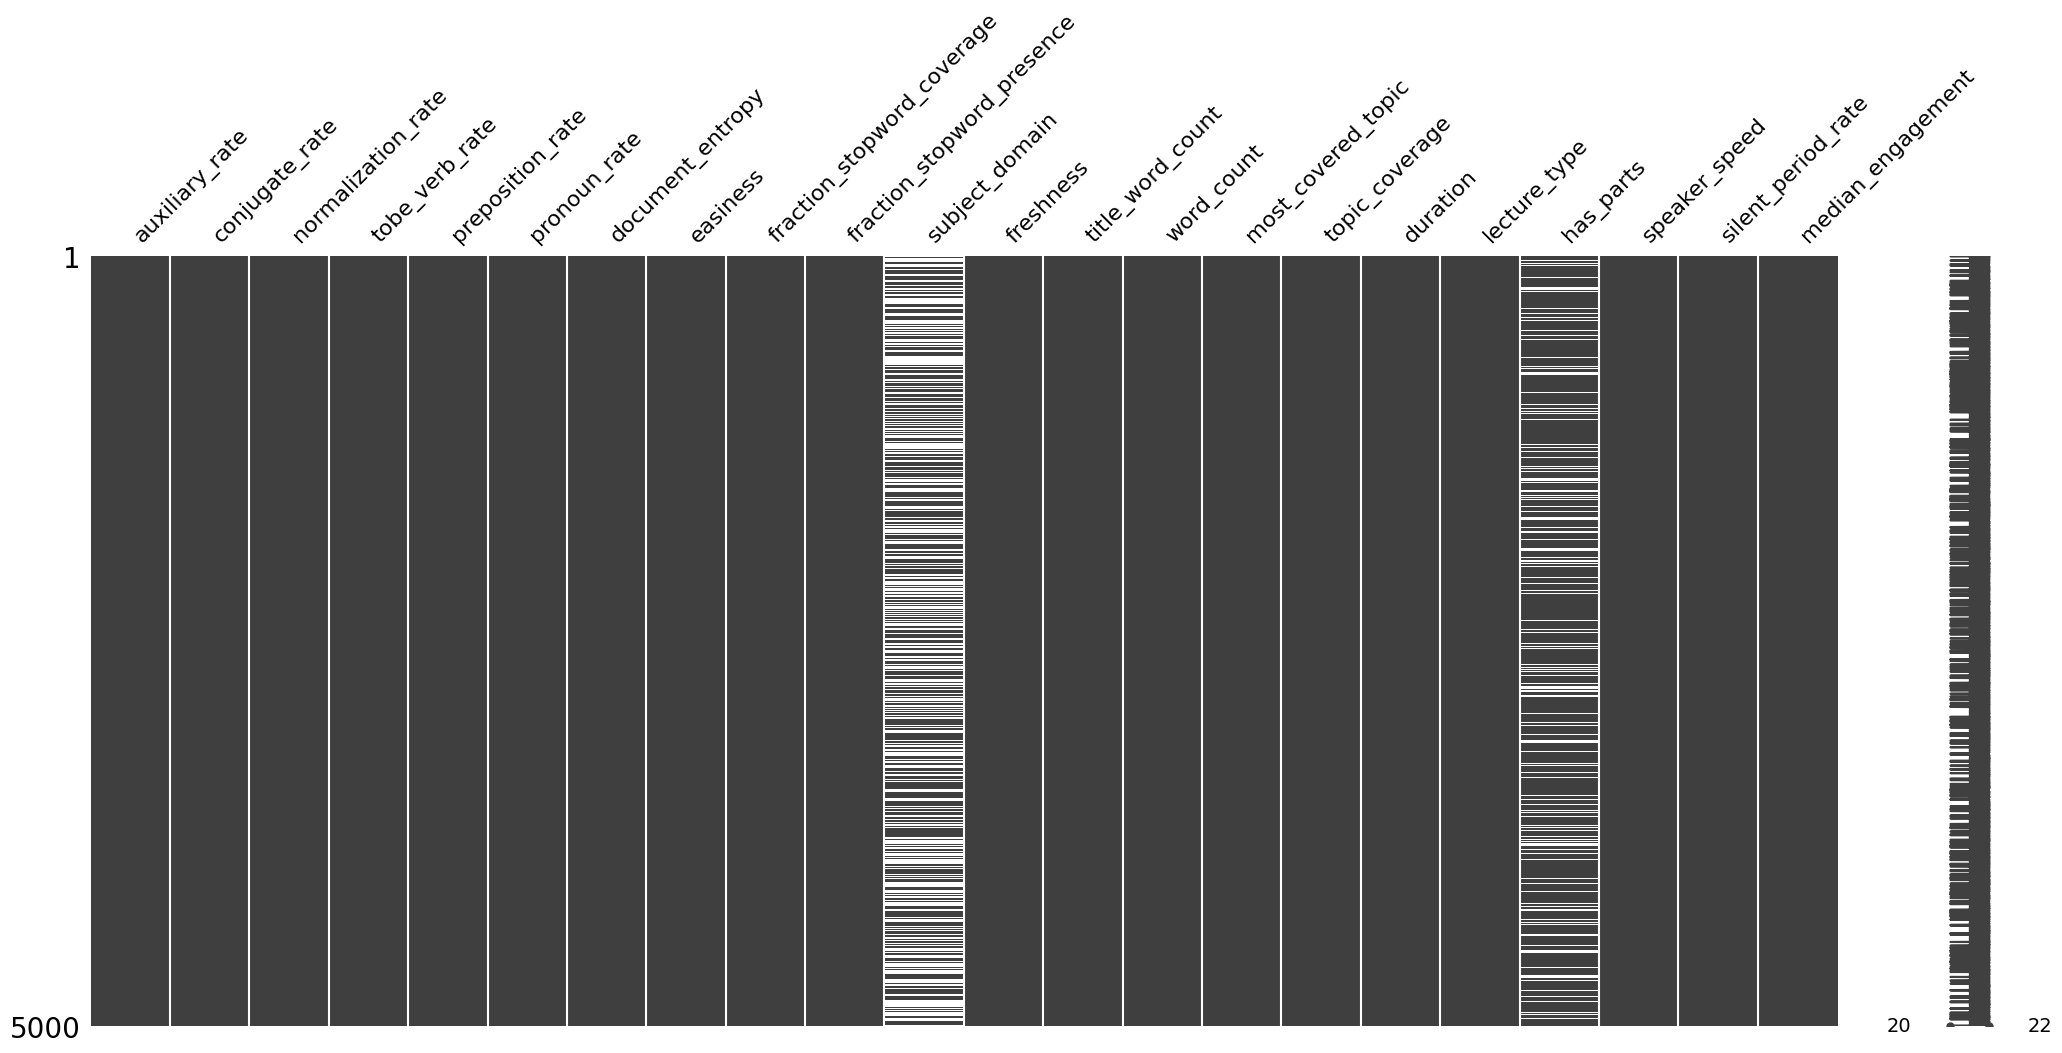

In [ ]:
# Missing Number Sample

msno.matrix(lectures.sample(5000))

#### 3: Numeric Variable Analysis


In [ ]:
# Use Frequency Encoding on most_covered_topic

topic_freq = lectures['most_covered_topic'].value_counts(normalize=True)
lectures['most_covered_topic_encoded'] = lectures['most_covered_topic'].map(topic_freq)

In [ ]:
# Split data into numeric and categorical dataframes for visualization

# Split numeric and categorical columns based on dtype
numeric_cols = lectures.select_dtypes(include=[np.number])

categorical_cols = lectures.select_dtypes(exclude=[np.number]).columns

# Split numeric columns into continuous and discrete sets
continuous_cols = numeric_cols[['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'freshness', 'topic_coverage', 'word_count',
       'duration', 'speaker_speed', 'silent_period_rate', 'median_engagement']].columns

discrete_cols = numeric_cols[['title_word_count','most_covered_topic_encoded']].columns # Treating word_count as continuous for visualization purposes due to the high number of unique counts

# Change to list
numeric_cols = numeric_cols.columns

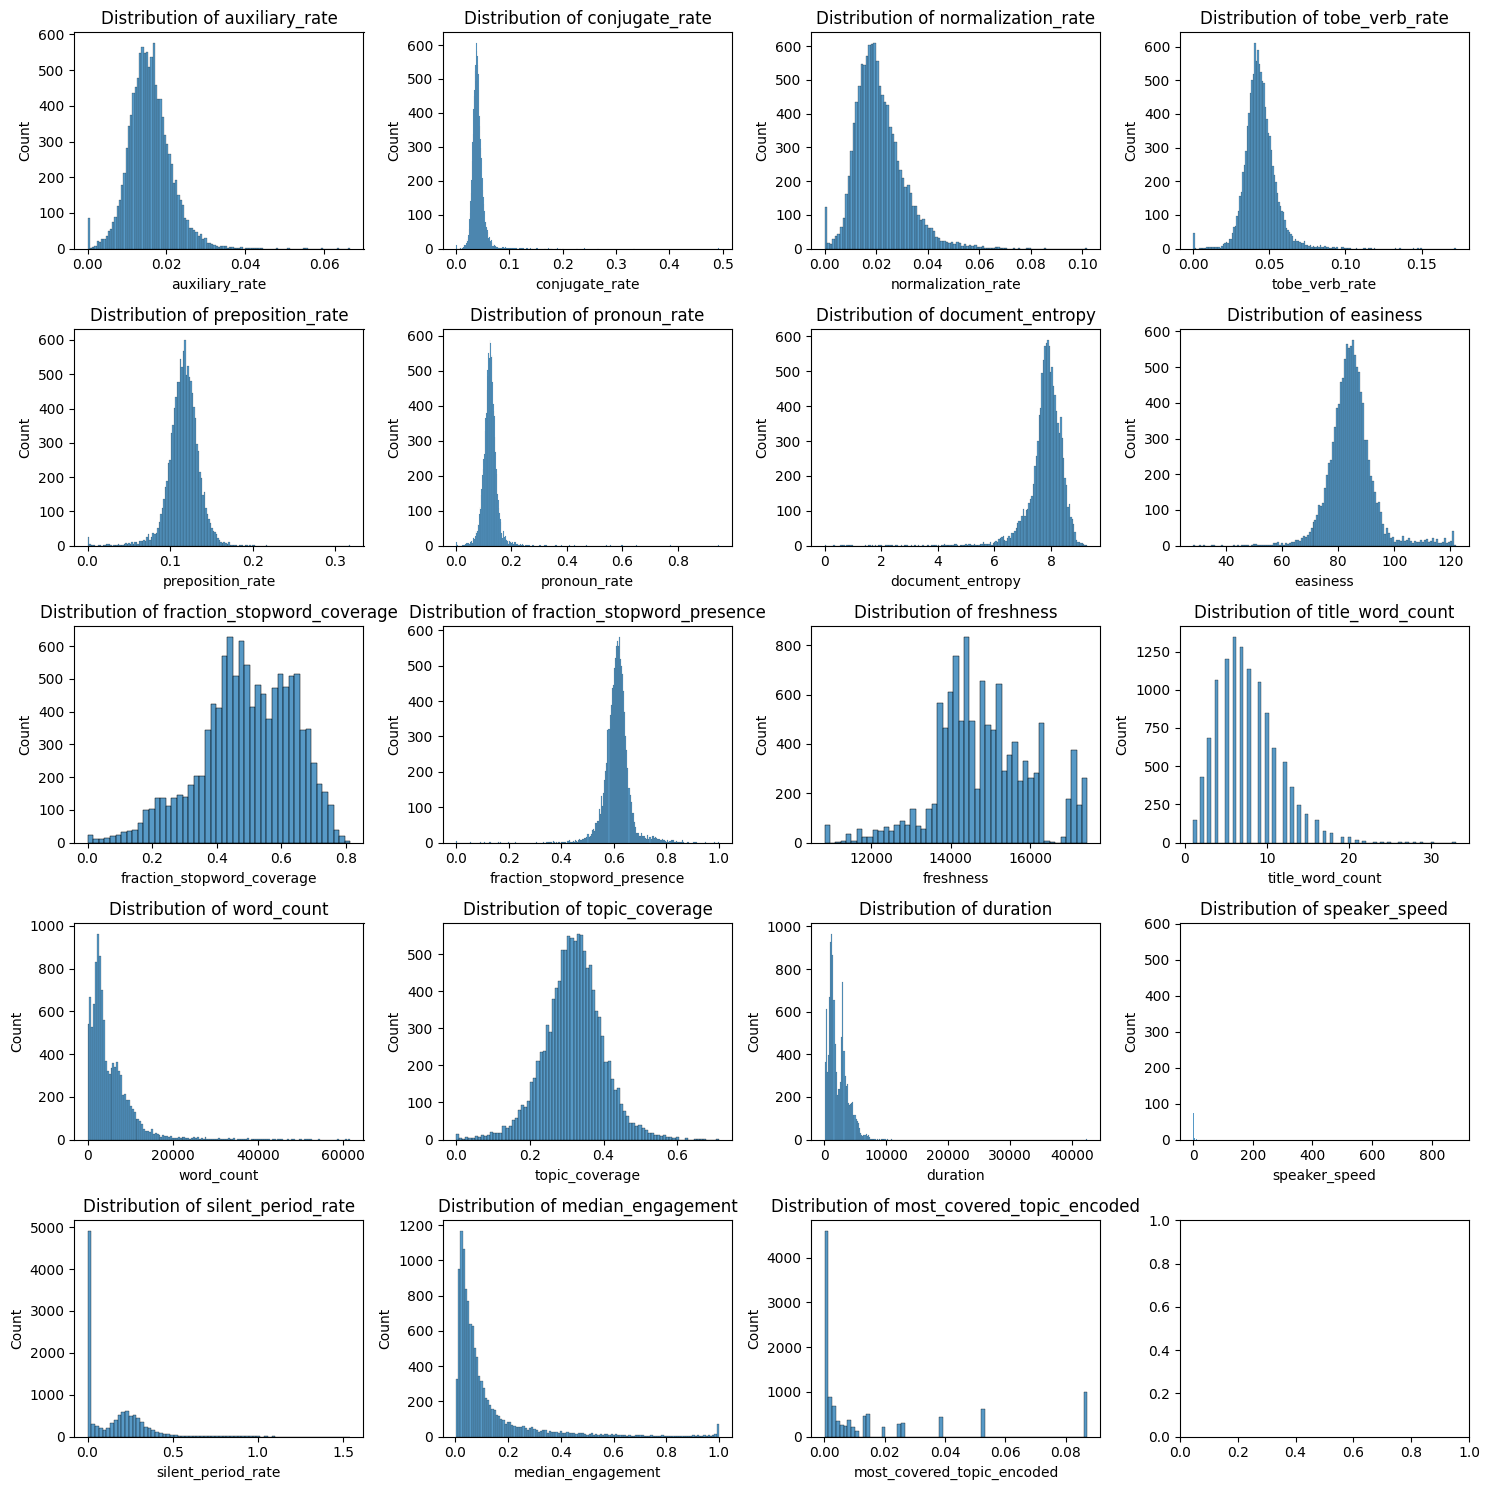

In [ ]:
# Visualize distribution of numeric variables

fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.flatten()

for i,col in enumerate(lectures[numeric_cols]):
    sns.histplot(lectures[col],ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()

plt.show()

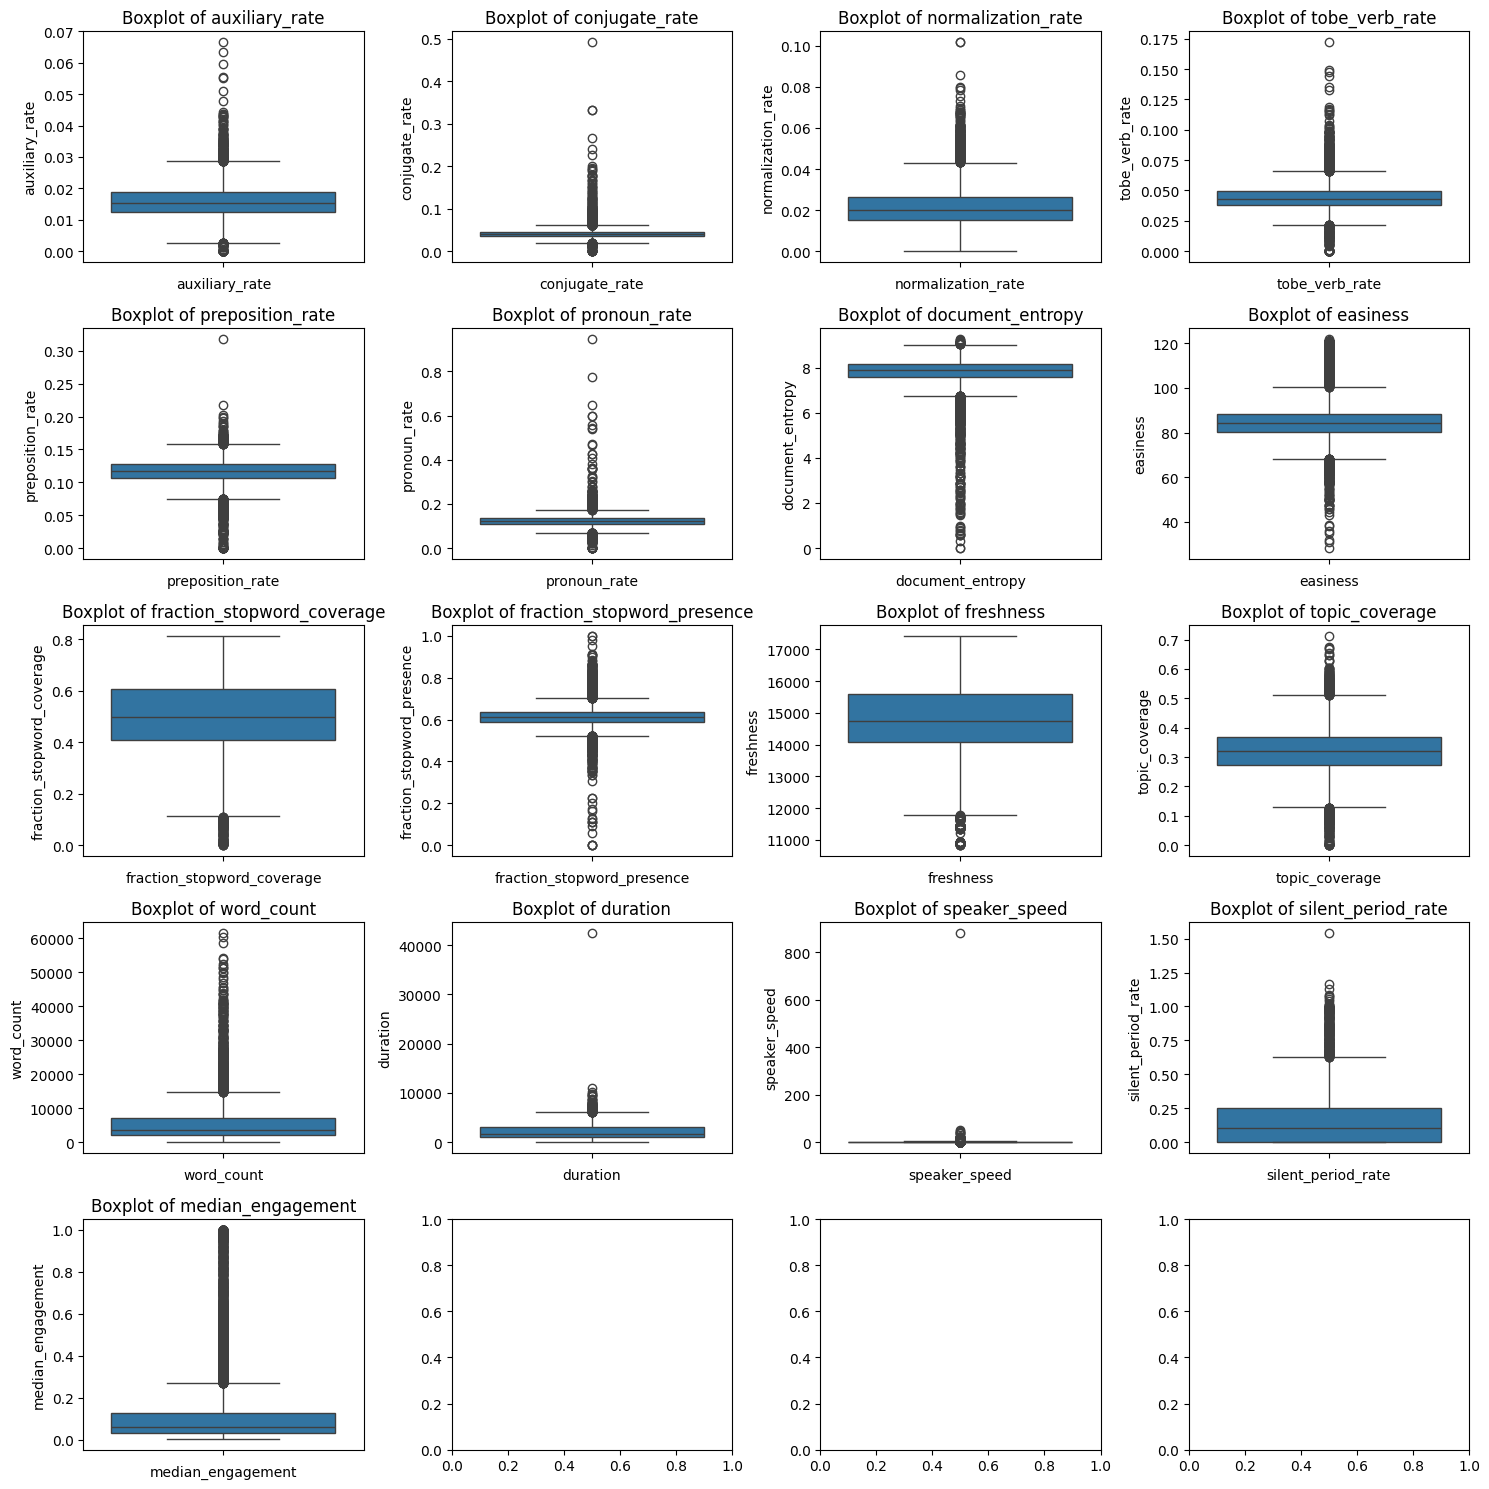

In [ ]:
# Boxplots of continuous variables to understand extent of outliers

fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.flatten()

for i,col in enumerate(lectures[continuous_cols]):
    sns.boxplot(lectures[col],ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()

plt.show()

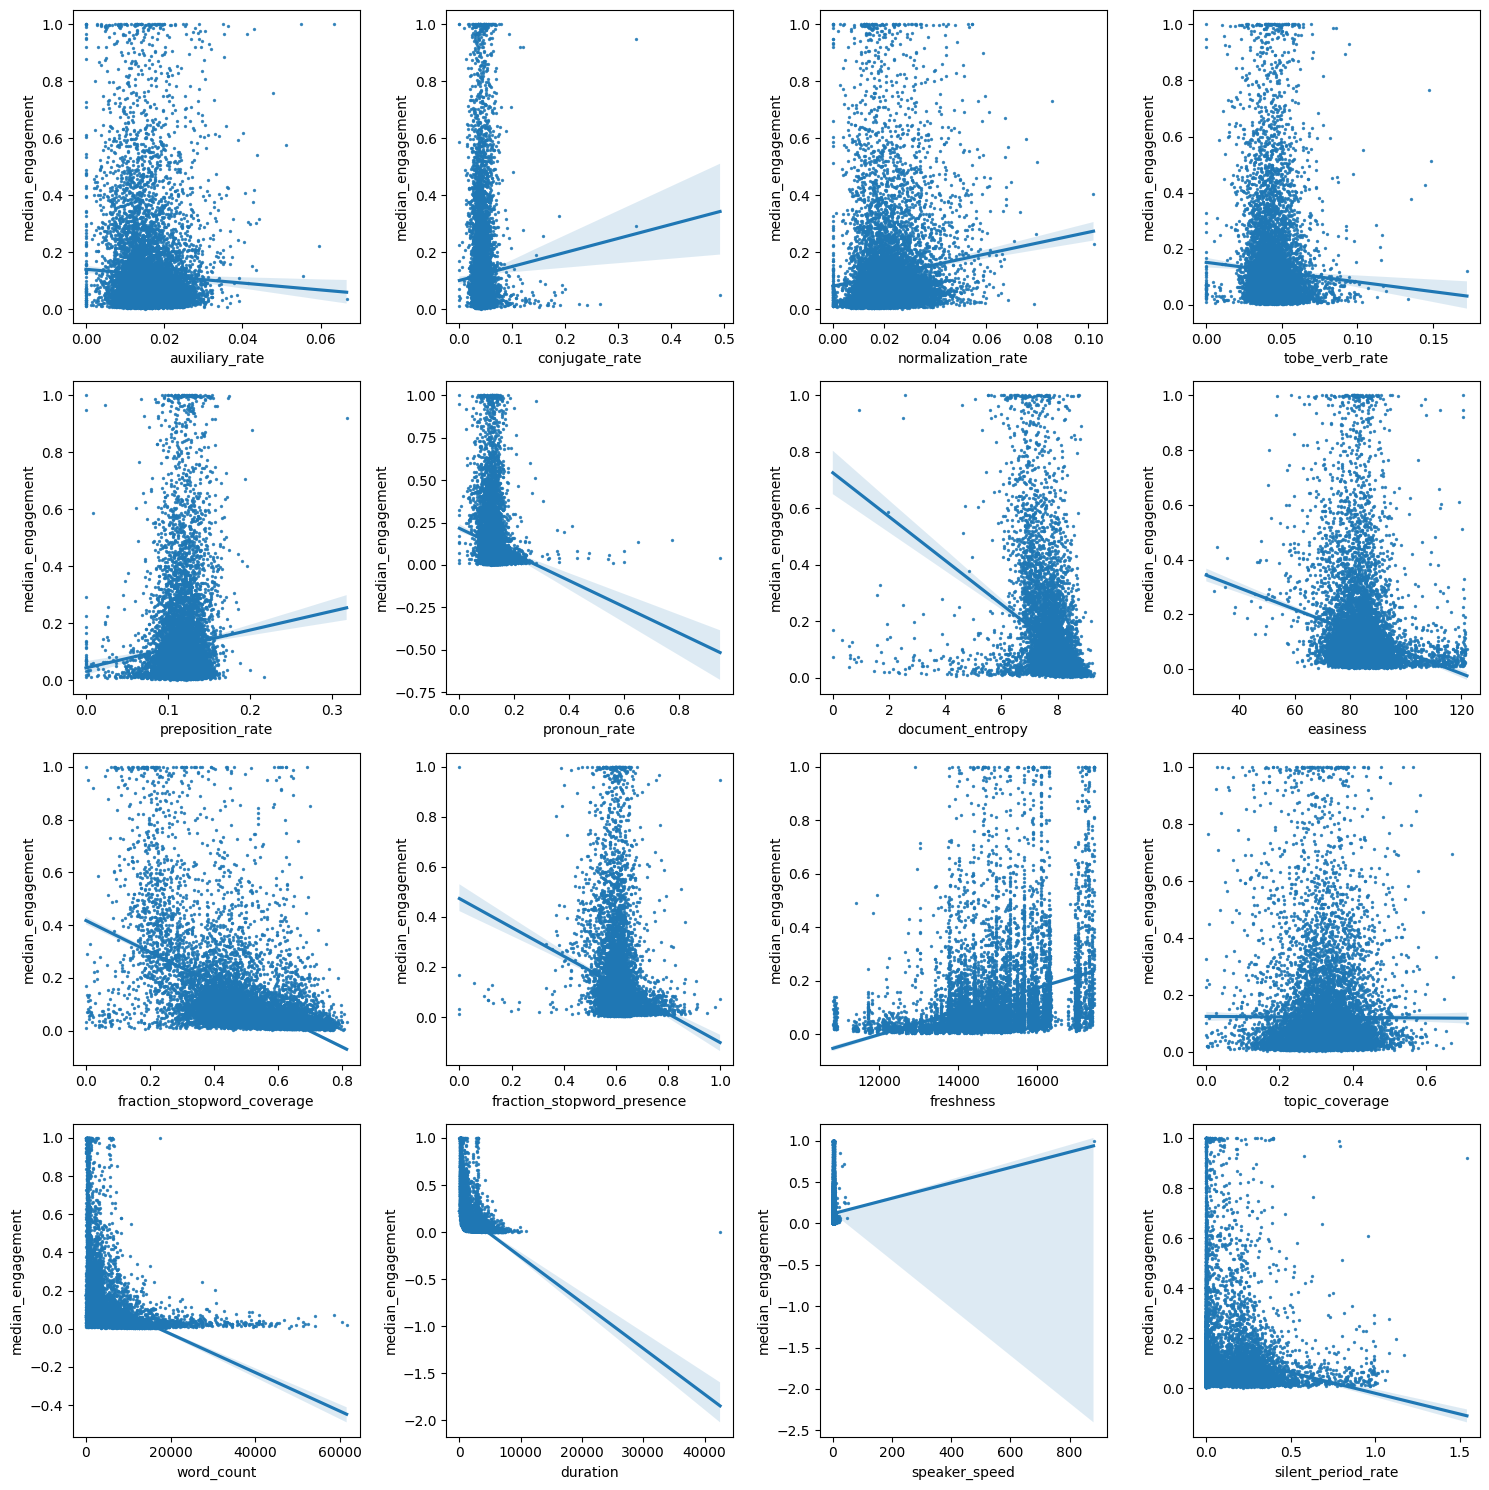

In [ ]:
# Surface level exploration of linear correlations between independent variables and target variable

fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()

y = lectures["median_engagement"]

for i,col in enumerate(lectures[continuous_cols].drop('median_engagement',axis=1)):
  sns.regplot(x=col,y=y,data=lectures[continuous_cols],ax=axes[i],scatter_kws={'s':2})

plt.tight_layout()

plt.show()

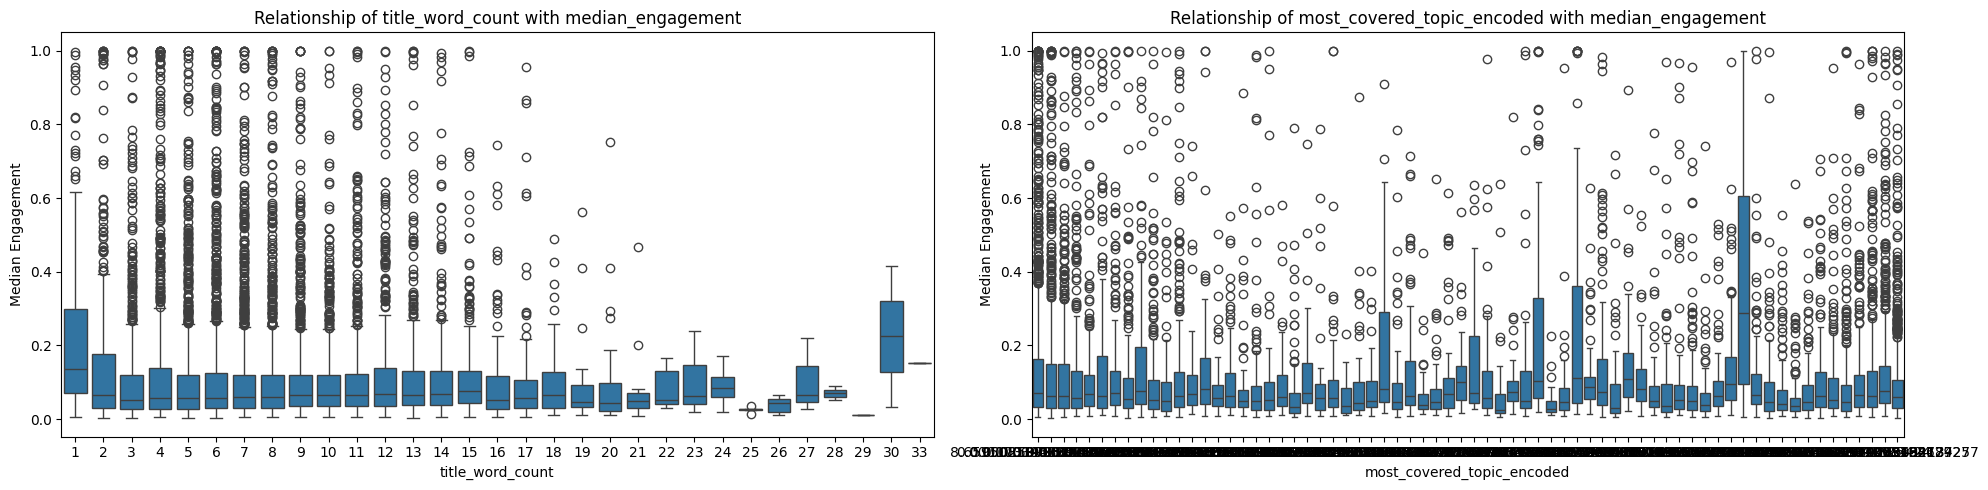

In [ ]:
# Visualize relationship of categorical variables with target variable using boxplots

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes = axes.flatten()

for i, col in enumerate(lectures[discrete_cols]):
    sns.boxplot(x=col, y="median_engagement", data=lectures, ax=axes[i])
    axes[i].set_title(f"Relationship of {col} with median_engagement")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Median Engagement")

plt.tight_layout()
plt.show()

#### 4: Categorical Variable Analysis

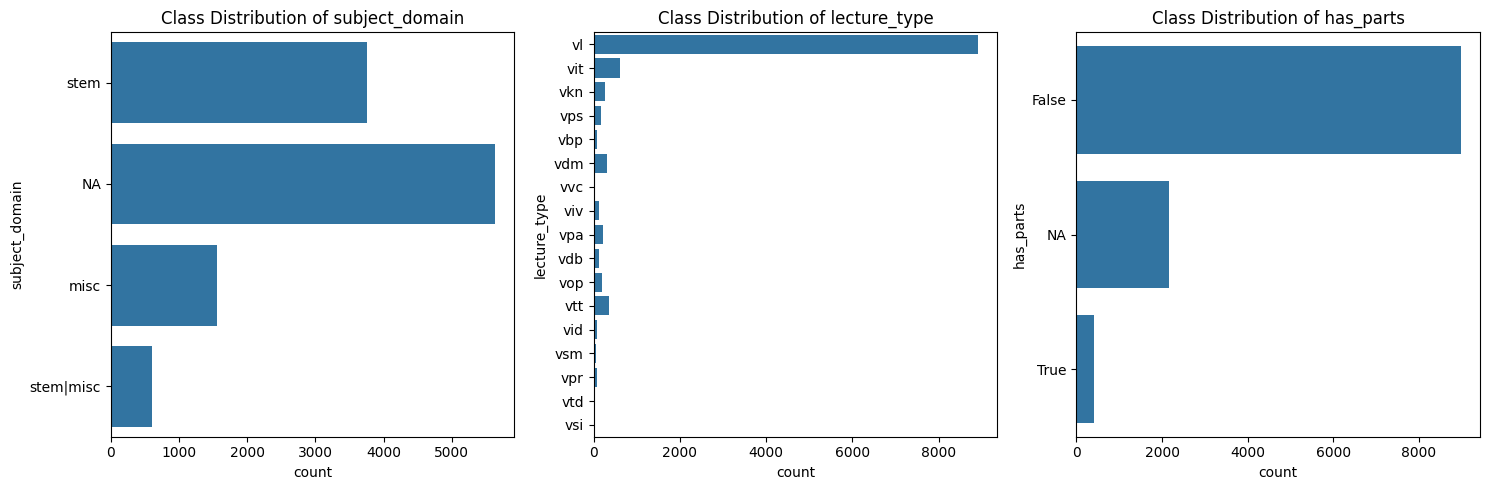

In [ ]:
# Visualize distribution of categorical variables

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Fill NaN with string for visualization
lectures_filled = lectures.fillna('NA')

for i,col in enumerate(lectures[categorical_cols].drop("most_covered_topic",axis=1)):
    sns.countplot(lectures_filled[col],ax=axes[i])
    axes[i].set_title(f"Class Distribution of {col}")

plt.tight_layout()

plt.show()

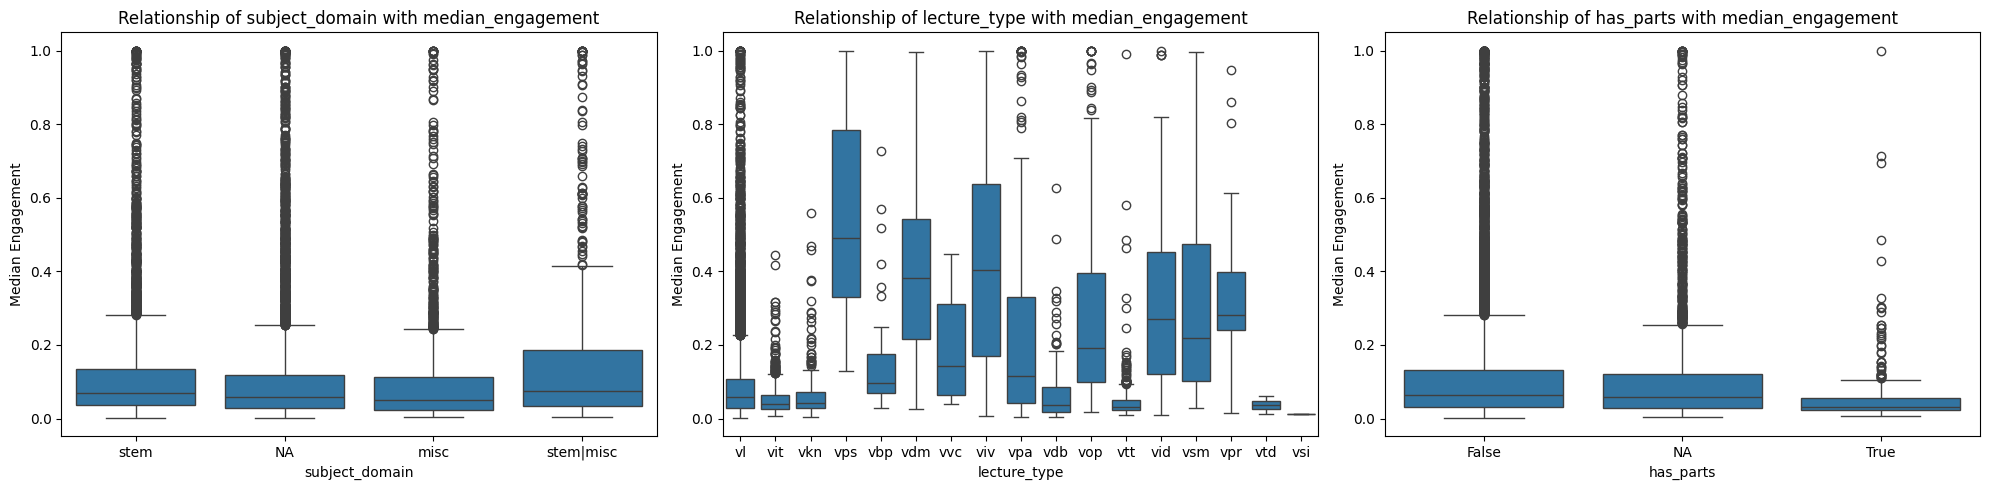

In [ ]:
# Visualize relationship of categorical variables with target variable using boxplots

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for i, col in enumerate(lectures[categorical_cols].drop("most_covered_topic", axis=1)):
    sns.boxplot(x=col, y="median_engagement", data=lectures_filled, ax=axes[i])
    axes[i].set_title(f"Relationship of {col} with median_engagement")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Median Engagement")

plt.tight_layout()
plt.show()

#### 5: Correlation Analysis


<Axes: >

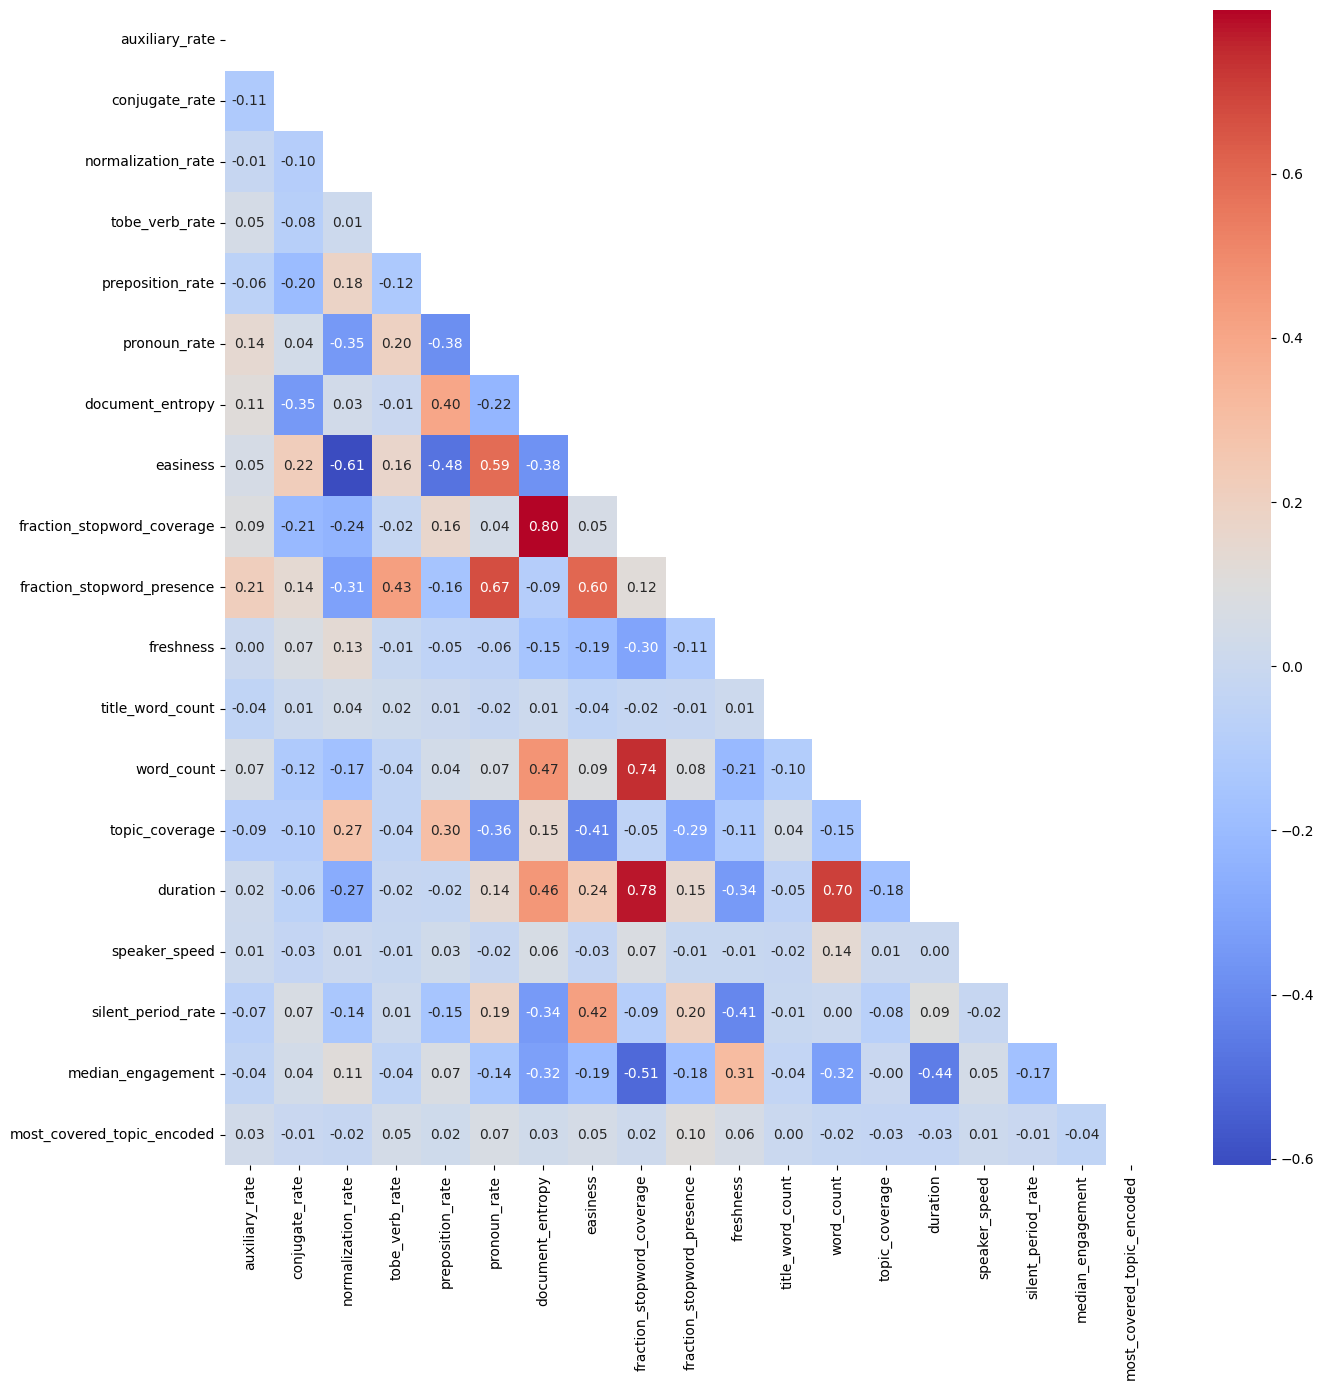

In [ ]:
# Heatmap to determine linear correlations between numeric variables

# Set fig size
plt.figure(figsize=(15,15))

lectures_corr = lectures[numeric_cols].corr()
mask = np.zeros_like(lectures_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(lectures_corr, mask=mask, cmap='coolwarm',annot=True,fmt='.2f')

In [ ]:
# Drop frequency encoded variable used for visualization

lectures = lectures.drop("most_covered_topic_encoded",axis=1)

#### EDA Summary

In my first analysis, I found that I was working with 22 columns and approximately 12000 rows of a mix of continuous and categorical datatypes. In my summary table of the categorical variables, I discovered that the "most_covered_topic" variable has 2096 unique values. Since I will have to numerically encode my categorical variables for regression modeling, this variable will need additional transformations so that I do not introduce thousands of new columns into my dataset (see below for frequency encoding justification). In my missing number analysis, I found that two columns have missing data: subject_domain and has_parts. Subject_domain is missing 49% of observations whereas has_parts is missing 19% of observations. In the third analysis, I was able to see that some of my variables are heavily skewed, which means I may need to apply transformations to ensure that the residuals are normally distributed. Through the simple linear regression plots of the continuous variables, I can see that some variables have a stronger linear correlation with the dependent variable than others based on the slope of the line of best fit. This means I may want to either remove those variables with little predictive ability or transform them. I also used box plots in this analysis and the next to see that there are many outliers across the majority of variables which should be removed. In the analysis of my categorical variables, I can see that there is heavy class imbalance for each categorical variable. It's also important to note that the classes for missing observations in subject_domain and has_parts are larger than some of the minority classes in the dataset. From the varation in size and distribution between class boxplots per variable, I can see that there is some relationship between my dependent variables and my target variable. There does not appear to be any relationship between missing values and the target variable, suggesting the values are missing completely at random. Finally, I can see that there are strong correlations between some variables, such as a 0.8 positive correlation between fraction_stopword_coverage and document_entropy and a -0.61 negative correlation between easiness and normalization_rate. Depending on my model choice, I may need to remove some variables if the multicollinearity is too strong.


## Data Preprocessing

#### Transformation Justification

Transformation #1: Frequency Encoding

I decided to use frequency encoding to numerically encode the extremely high cardinal variable most_covered_topic. Frequency encoding replaces each category with a proportion representing how frequent that category appears in the dataset. I decided to use frequency encoding because it offers a meaningful numerical representation; rather than assigning a random value to each category, that category now is represented by how frequent it is in the data.

Transformation #2: KNN Imputation

As noted in the previous section, the first issue that I identifed was missing data in two columns: subject_domain and has_parts. There are several ways to handle this, such as imputing the mode, creating a class for the missing data, or using prediction to imput the values. Since I have relatively few categories for both of these variables, I believe imputing the mode would not be a meaningful approach and would harm the integrity of the data. Additionally, the missing data appears to missing at random, so I would not create classes for the missing observations since I do not believe the "missingness" has any meaning with regards to the target variable. Therefore, I believe the best approach is to impute the values using prediction, which I will use K-nearest Neighbors (KNN) to do so due to its simplicity yet effectiveness. I am choosing to use the 5 nearest neighbors to impute the values of the missing observations, which proved effective for my model.

Transformation #3: Remove Outliers

As seen in the exploratory data analysis, there are outliers in every single variable, with some variables having a significant number of outliers. Outliers need to be addressed before regression because they can bias coefficients and increase model error. Therefore, I will be removing outliers that fall outside of 5 times the interquartile range for all numeric variables. The typical threshold for removing outliers is 1.5*IQR, but I wanted to introduce a stricter threshold to avoid removing too much data. I decided on 5 through trial and error, testing to see which threshold improved my model the most.

Transformation #4: Feature Selection

As seen by my correlation analysis, some variables do not have a strong relationship with my target variable. These variables should be removed from modeling to avoid adding meaningless noise. I employ feature selection to do so using scikit-learn's SelectKBest method on my numeric variables (I am only doing so on numeric features for simplicity, seeing as categorical variables are not encoded until the next section). This method keeps K best features using a scoring function. In my case, I decided to use the f_regression score, which is a statistical measure regarding the linear correlation between my dependent and independent variables. I set K to 10 through trial and error, which maximized performance of my model.

Transformation #5: Transformation Search and Application*

As seen in my distribution analysis, some of the variables have a strong skew which puts the linear regression assumption that residuals are normally distributed at risk. For some variables, it was clear which transformation should be applied to achieve a normal distribution. For example, I knew I should apply log transformations for variables with a right skew (word_count, duration). The target variable also has a strong right skew and so I will log transform this as well, keeping in mind that I will have to undo this transformation when interpreting the outputs.

I realized it was not immediately clear for all variables which transformations would maximize the linear correlation with the target variable. Therefore, I devised a method below using a custom transformation_search function to loop through several transformations (log, sqrt, squared, cubed, or no transformation) and perform a simple linear regression with each independent variable with each transformation predicting median_engagement. Then, I find the best transformation for each variable based on which transformation gave it the highest R^2 score with median_engagement. Then, I created the apply_transformations function to apply each variable's best transformation.

Transformation #6: Normalization*

After I have performed all of the other transformations, I will normalize all of the numeric variables so that every numeric variable is on the same scale, which is necessary before regression. I am using a standard scaler which will normalize each feature using its mean and standard deviation.

*For transformations 5 and 6, I will not be applying them within the provided preprocess_lecture_dataset function. This is because this function returns the full preprocessed dataset whereas I need to apply transformations 5 and 6 after the train test split to avoid problems associated with data leakage. For normalization, it is standard practice to fit your scaler on your training dataset and then transform both the train and test dataset using the fitted scaler. This is to avoid using test values (which are intended to represent future unseen data) to transform the data/create the model. The same principle applies to my transformation search, as I do not want to determine the best transformation using future unseen data. Therefore, I will apply transformations 5 and 6 below using a custom function split_processing that will be applied directly before training.


In [ ]:
def frequency_encode(dataset,col):
  """
  Takes in a dataset and uses frequency encoding on the specified column. Returns the original dataset with the frequency encoded variable.
  """
  freq = dataset[col].value_counts(normalize=True)
  dataset[col] = dataset[col].map(freq)

  return dataset


In [ ]:
def impute_missing_vals_knn(dataset,cols):
  """
  Takes in a dataset and a list of columns with missing data. KNN Imputer is used to impute the missing data using the 5 nearest neighbors. Returns the original dataset with missing values imputed.
  """
  # Make a copy of the dataset to avoid modifying the original
  dataset = dataset.copy()

  # Keep track of LabelEncoders for categorical columns
  encoders = {}

  # Convert categorical columns to str then encode using LabelEncoder
  for col in cols:
      if dataset[col].dtype == 'object' or dataset[col].dtype == 'bool':
          encoder = LabelEncoder()
          dataset[col] = dataset[col].astype(str)
          dataset[col] = encoder.fit_transform(dataset[col])
          encoders[col] = encoder

  # Select only the columns with missing data for KNNImputer
  columns_to_impute = dataset[cols]

  # Initialize KNN Imputer
  imputer = KNNImputer(n_neighbors=5)

  # Apply imputation
  imputed_data = imputer.fit_transform(columns_to_impute)

  # Replace the original columns with imputed data
  dataset[cols] = imputed_data

  # Decode categorical columns back to their original form
  for col in cols:
      if col in encoders:
          encoder = encoders[col]
          dataset[col] = encoder.inverse_transform(dataset[col].round().astype(int))

  return dataset

In [ ]:
def remove_outliers(dataset,numeric_cols):
  """
  Takes in a dataset and removes the outliers in the specified columns.
  """
  for col in numeric_cols[numeric_cols!='median_engagement']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

  return dataset

In [ ]:
def feature_select(dataset,k,numeric_cols,y_var):
  """
  Takes in a dataset and returns the original dataframe with K selected features.
  """

  X_num = dataset[numeric_cols].drop("median_engagement",axis=1)
  X_cat = dataset.drop(columns=numeric_cols,axis=1).columns

  y = dataset[y_var]

  selector = SelectKBest(score_func=f_regression,k=k)

  selector.fit(X_num,y)

  selected_features = X_num.columns[selector.get_support()]

  selected_dataset = pd.concat([dataset[selected_features],dataset[X_cat]],axis=1)

  selected_dataset = pd.concat([selected_dataset,y],axis=1)

  return selected_dataset

In [ ]:
def transformation_search(dataset,numeric_cols,y_var='median_engagement'):
  """
  Takes in the dataset, a list of numeric columns, and the target variable which is automatically set to median_engagement.
  Searches through a dictionary of transformations for each independent variable to find the transformation that has the best R^2 with the log of the response variable, using simple Linear Regression.
  Returns a dictionary of the best transformation for each variable.
  """

  # Define transformations to search
  transformations = {
      "log": lambda x: np.log(x+0.0001), # Add a small constant to avoid error
      "sqrt":np.sqrt,
      "squared": lambda x: x**2,
      "cubed": lambda x: x**3,
      "no transformation": lambda x: x # No transformation
  }

  best_transformations = {}
  transformation_dict = {}

  X = dataset[numeric_cols].drop(y_var,axis=1).select_dtypes(exclude=['bool'])
  y = np.log(dataset[y_var])

  for feature in X:
    best_score = -np.inf
    best_transformation = None

    for transform_name, transform in transformations.items():
        # Apply transformation
        transformer = FunctionTransformer(transform)
        X_transformed = transformer.fit_transform(X[[feature]])

        # Replace infinite and NaN values with a finite number (e.g., 0)
        X_transformed = np.nan_to_num(X_transformed, posinf=0, neginf=0)

        # Evaluate linearity (e.g., using R-squared)
        model = LinearRegression()
        scores = cross_val_score(model, X_transformed, y, scoring='r2')
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_transformation_name = transform_name
            best_transformation = transform

    best_transformations[feature] = best_transformation_name
    transformation_dict[feature] = best_transformation

  return transformation_dict

In [ ]:
def apply_transformations(dataset, transformation_dict):
  """
  Takes in a dataset and applies the transformations to the features specified in the transformation_dict.
  """
  for feature, transformation in transformation_dict.items():
    if feature=='freshness':
      dataset[feature] = ((dataset[feature])**3)/100000000 # Special case caused by cubic transformation, needed to be scaled down
    else:
      dataset[feature] = transformation(dataset[feature])

  # Transform target variable
  dataset['median_engagement'] = np.log(dataset['median_engagement'])

  return dataset

In [ ]:
def normalize(dataset,numeric_cols):
  """
  Takes in a dataset and list of numeric_cols and returns the original dataframe with normalized numeric columns.
  """

  # Initiate MinMaxScaler
  scaler = StandardScaler()

  # Scale the numeric columns
  dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

  return dataset

In [ ]:
def preprocess_lecture_dataset(dataset):
    """
    Takes the lecture dataset and transforms it with necessary pre-processing steps.

    Params:
        dataset (pandas.DataFrame): DataFrame object that contains the original dataset provided for the coursework

    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data
                                                pre-processing has been carried out
    """
    # Transformation 1. Frequency Encoding
    preprocessed_dataset = frequency_encode(dataset,'most_covered_topic')

    # Select the numeric columns
    numeric_cols = preprocessed_dataset.select_dtypes(include=[np.number]).columns

    # Convert datatype
    preprocessed_dataset[numeric_cols] = preprocessed_dataset[numeric_cols].astype('float64')

    # Transformation 2. Input Missing Values Using Class Frequency
    preprocessed_dataset = impute_missing_vals_knn(preprocessed_dataset,['has_parts','subject_domain'])

    # Transformation 3. Remove Outliers
    preprocessed_dataset = remove_outliers(preprocessed_dataset,numeric_cols)

    # Transformation 4. Select 10 Best Numeric Features
    preprocessed_dataset = feature_select(preprocessed_dataset,10,numeric_cols,"median_engagement")

    return preprocessed_dataset

In [ ]:
preprocessed_lectures = preprocess_lecture_dataset(lectures)

In [ ]:
preprocessed_lectures.head()

,normalization_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,freshness,word_count,duration,silent_period_rate,subject_domain,lecture_type,has_parts,median_engagement
0,0.034049,0.089563,7.753995,75.583936,0.428135,0.553664,16310.0,2668.0,890.0,0.0,stem,vl,False,0.502923
1,0.018763,0.103002,8.305269,86.870523,0.602446,0.584498,15410.0,7512.0,2850.0,0.0,nan,vl,False,0.011989
2,0.030720,0.124255,7.965583,81.915968,0.525994,0.605685,15680.0,4264.0,1680.0,0.0,stem,vit,False,0.041627
3,0.016873,0.104339,8.142877,80.148937,0.504587,0.593664,15610.0,2869.0,1270.0,0.0,stem,vl,False,0.064989
4,0.023412,0.102606,8.161250,76.907549,0.559633,0.581637,14920.0,4840.0,2000.0,0.0,nan,vkn,False,0.052154


## Encode Dataset for Modeling

In [ ]:
def prepare_final_dataset(preprocessed_dataset):
    """
    takes the preprocessed lecture dataset and transforms it to the vector representation.

    Params:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the original
                                                dataset provided for the coursework

    Returns:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
    """

    # One-Hot Encoding
    processed_dataset = pd.get_dummies(preprocessed_dataset,drop_first=True)

    X = processed_dataset.drop(columns=['median_engagement'],axis=1)
    y = processed_dataset['median_engagement']

    return preprocessed_dataset, X, y

In [ ]:
final_dataset, full_X, full_y = prepare_final_dataset(preprocessed_lectures)

In [ ]:
full_X

,normalization_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,freshness,word_count,duration,silent_period_rate,...,lecture_type_vpa,lecture_type_vpr,lecture_type_vps,lecture_type_vsi,lecture_type_vsm,lecture_type_vtd,lecture_type_vtt,lecture_type_vvc,has_parts_True,has_parts_nan
0,0.034049,0.089563,7.753995,75.583936,0.428135,0.553664,16310.0,2668.0,890.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,0.018763,0.103002,8.305269,86.870523,0.602446,0.584498,15410.0,7512.0,2850.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,0.030720,0.124255,7.965583,81.915968,0.525994,0.605685,15680.0,4264.0,1680.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,0.016873,0.104339,8.142877,80.148937,0.504587,0.593664,15610.0,2869.0,1270.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.023412,0.102606,8.161250,76.907549,0.559633,0.581637,14920.0,4840.0,2000.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11542,0.031954,0.119826,7.622234,75.750856,0.461774,0.621883,14180.0,4108.0,1800.0,0.177283,...,False,False,False,False,False,False,False,False,False,False
11543,0.031276,0.128487,7.781813,80.620236,0.498471,0.611722,13920.0,3509.0,1600.0,0.194918,...,False,False,False,False,False,False,False,False,False,True
11544,0.013967,0.135016,7.800766,94.080225,0.504587,0.654741,13990.0,4029.0,2550.0,0.338601,...,False,False,False,False,False,False,False,False,False,False
11546,0.032448,0.094395,6.775492,74.053098,0.189602,0.560472,15900.0,337.0,130.0,0.005131,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
full_y

,median_engagement
0,0.502923
1,0.011989
2,0.041627
3,0.064989
4,0.052154
...,...
11542,0.032299
11543,0.044655
11544,0.038525
11546,0.998364


Let us now save the final data

In [ ]:
full_X.to_csv(local_path+"features_final.csv", index=False)
np.save(local_path+"labels_final.npy", full_y.to_numpy())

# Modeling and Evalution

## Train Ridge Regression Model

#### Ridge Regression Parameter Grid Search

Here I perform a grid search which searches through a range of alphas from 0 to 5000 to determine which alpha produces the best model on my transformed dataset. I am measuring the best model here by which one minimizes the mean squared error (or maximizes the negative mean squared error). I am using scikit-learn's GridSearchCV function which performs 10-fold cross-validation to calculate the negative mean squared error. Using this method, I find that the best alpha for my dataset is 0.01.

In [ ]:
# Determine optimal alpha using Grid Search

param_grid = {'alpha':[0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 75, 100, 150, 250, 500, 1000, 5000]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=10)

grid_search.fit(full_X, full_y)

best_alpha = grid_search.best_params_['alpha']

print(f"Best alpha: {best_alpha}")

Best alpha: 0.01


In [ ]:
def train_ridge_model(X,y, hyperparams):
    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value

    Returns:
        ridge_model(scikit-learn model): A trained scikit-learn model object
        :
    """

    ridge_model = Ridge(alpha=hyperparams['alpha'],random_state=3)

    ridge_model.fit(X, y)

    return ridge_model

- Define the python dictionary `hyperparams` with the hyperparameters needed for Ridge Regression.

In [ ]:
hyperparams = {
    'alpha': 0.01
}

In [ ]:
temp_ridge_model = train_ridge_model(full_X, full_y, hyperparams)

## Gaussian (RBF) Kernel Regression Model

In [ ]:
def gauss_kernel(x, x_dash, gamma):
    """
    takes two data points and calculates their similarity using the RBF function.

    params:
        x (numpy.array): point 1 coordinates
        x_dash (numpy.array): point 2 coordinates
        gamma : relevant hyperparameter for the Gaussian Kernel

    returns:
        similarity (float): similarity between the two points
    """

    euc_distance = np.linalg.norm(x - x_dash)
    similarity = np.exp(-gamma * euc_distance)

    return similarity

In [ ]:
def train_kernel_ridge_model(X,y, hyperparams, kernel_function, kernel_params):
    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value
        kernel_function (callable): a callable python function which is the kernel function
        kernel_params (dict): a dictionary of kernel parameters where the key is the kernel parameter name,
                            and the value is the parameter value

    Returns:
        kernel_ridge_model(scikit-learn model): A trained scikit-learn model object
    """

    kernel_ridge_model = KernelRidge(alpha=hyperparams['alpha'], kernel=kernel_function, kernel_params=kernel_params)
    kernel_ridge_model.fit(X, y)

    return kernel_ridge_model

In [ ]:
hyperparams = {
    "alpha" : 0.1
}

kernel_params = {
    "gamma" : 1e-2
}

temp_kernel_ridge_model = train_kernel_ridge_model(full_X, full_y, hyperparams, gauss_kernel, kernel_params)

In [ ]:
temp_y = temp_kernel_ridge_model.predict(full_X)

[0.68122136 0.48661476 0.56950286 ... 0.43522832 0.9107818  0.43891568]


## Create Evaluation Metrics

**Metric 1**

The first evaluation metric I will be using is the Root Mean Square Error (RMSE). While MSE represents how the average squared error in your predictions, this value is not interpretable in the scale of the original target variable. Therefore, I will calculate RMSE to improve interpretability. Since I am applying a log transformation to my target variable, I will also undo that transformation before calcualting RMSE to ensure that I can evaluate my error on the original scale of median_engagement (between 0 and 1).  

In [ ]:
def eval_metric_1(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    # Undo log transformation
    y_actual = np.exp(y_actual)
    y_predicted = np.exp(y_predicted)

    # Calculate RMSE
    metric = (y_actual-y_predicted)**2
    metric = np.mean(metric)
    metric = np.sqrt(metric)

    return metric

**Metric 2**

The second evaluation metric I will be using is the R^2 score. It is calculated using the sum of the squared residuals over the total sum of squares to represent a percentage of how much variance in the dependent variable is explained by the independent variables. This will complement my first evaluation metric because the RMSE will estimate model error whereas the R^2 will serve as a measure of good linear fit.

In [ ]:
def eval_metric_2(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    # Calculate R2
    ss_res = np.sum((y_actual - y_predicted) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    metric = 1 - ss_res/ss_tot

    return metric

## Evaluate Ridge Regression

#### Final Data Preprocessing (Transformations 5 and 6)

Here, I define the function split_processing to perform the train-test split and then apply the final two transformations which ought to be applied after the split to avoid data leakage. I am performing a train-test split because it is the best way to evaluate whether or not the model is overfitting. Within this function, I am performing my transformation search and fitting my standard scaler on my train data, and then applying the best transformations and normalizing both the training and test sets.


In [ ]:
def split_processing(X,y):
  """
  Implements the preprocessing steps which must be implemented after the train test split to avoid data leakage.
  Transformations: Independent Variable Transformation Search and Application, Normalization
  Returns X and y split into train and test sets.
  """
  # Combine X and y, then split into train and test
  if type(y)!=pd.DataFrame:
    y = pd.DataFrame(y,columns=['median_engagement'])
  combined_df = pd.concat([X, y], axis=1)
  train, test = train_test_split(combined_df, test_size=0.2, random_state=3)

  # Select numeric columns
  numeric_cols = train.select_dtypes(include=[np.number]).columns

  # Find and apply transformations
  transformation_dict = transformation_search(train, numeric_cols)
  apply_transformations(train, transformation_dict)
  apply_transformations(test, transformation_dict)

  # Split into X and y (after transformations)
  X_train = train.drop(columns=['median_engagement'])
  y_train = train['median_engagement'] # Log transformed
  X_test = test.drop(columns=['median_engagement'])
  y_test = test['median_engagement'] # Log transformed

  # Normalize
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return X_train, X_test, y_train, y_test


In [ ]:
def visualize_final_results(train_sizes, train_predictions,train_actuals,test_predictions,test_actuals,train_rmses,test_rmses,train_r2s,test_r2s,kernel=False):
    """
    Takes in the results from training and outputs visualizations to evaluate results. If kernel==True, the training subsets plot is not created.
    """
    if kernel==False:
      # Plot training and test RMSE over training subsets
      fig, ax = plt.subplots(1, 2, figsize=(15,5))
      ax[0].plot(train_sizes, train_rmses, label='Train RMSE')
      ax[0].plot(train_sizes, test_rmses, label='Test RMSE')
      ax[0].set_xlabel('Train Size')
      ax[0].set_ylabel('RMSE')
      ax[0].legend()

      # Plot training and test R2 over training subsets
      ax[1].plot(train_sizes, train_r2s, label='Train R2')
      ax[1].plot(train_sizes, test_r2s, label='Test R2')
      ax[1].set_xlabel('Train Size')
      ax[1].set_ylabel('R2')
      ax[1].legend()

    # Create a dataframe to display evaluation metrics from run using the entire train dataset
    eval_data = [[train_rmses[-1], test_rmses[-1]],[train_r2s[-1], test_r2s[-1]]]
    index = ['RMSE', 'R2']
    columns = ['Train', 'Test']
    df = pd.DataFrame(eval_data, index=index, columns=columns)
    display(df.round(decimals=4))

    # Plot train predictions vs actuals
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].scatter(train_predictions, train_actuals, label='Train',s=10,alpha=0.5)
    ax[0].plot([-5.25, 0], [-5.25, 0], linestyle='--', color='gray')
    ax[0].set_xlabel('Predicted Values')
    ax[0].set_ylabel('Residuals')
    ax[0].legend()

    # Plot test predictions vs acatauls
    ax[1].scatter(test_predictions, test_actuals, label='Test',s=10,alpha=0.5)
    ax[1].plot([-5.25, 0], [-5.25, 0], linestyle='--', color='gray')
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Residuals')
    ax[1].legend()


,Train,Test
RMSE,0.1177,0.1024
R2,0.5929,0.6132


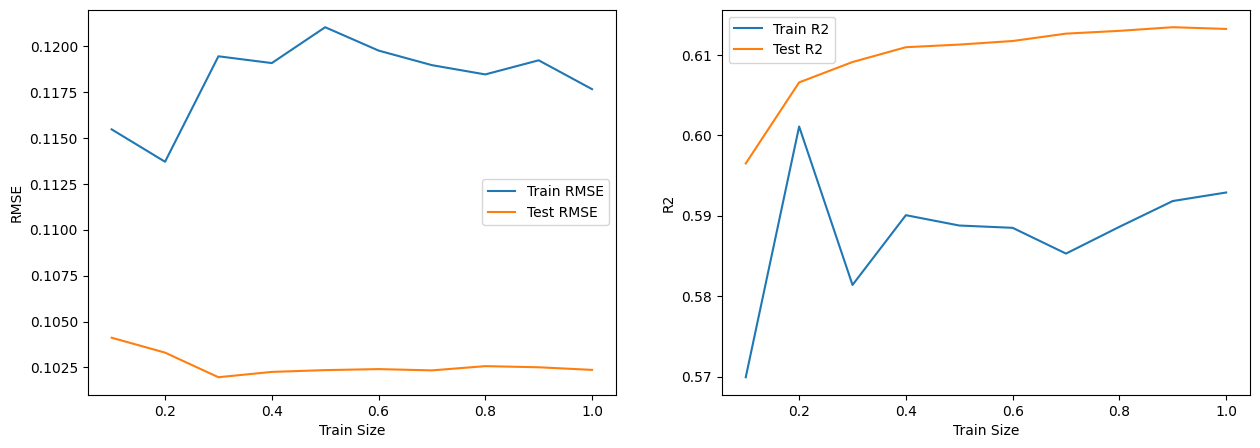

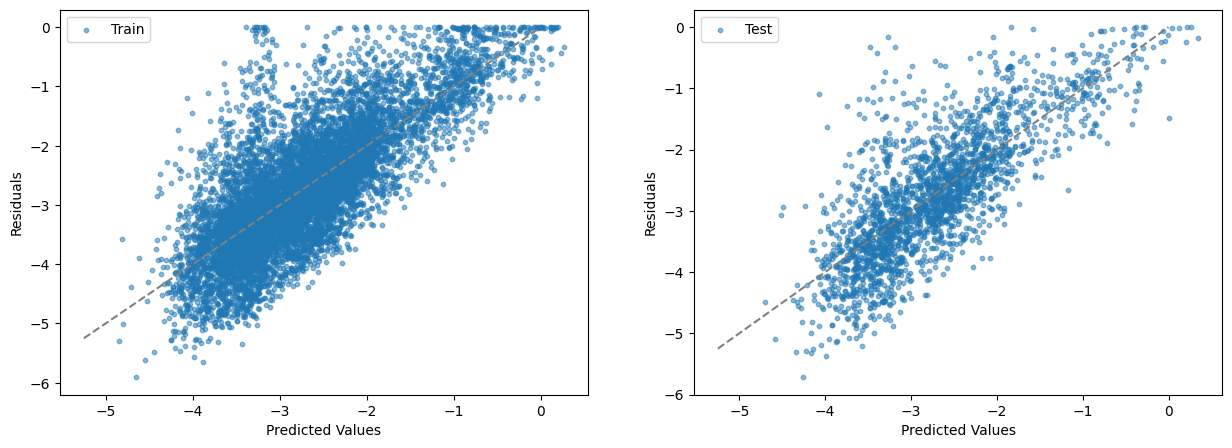

In [ ]:
def evaluate_ridge_model(X,y):
    """
    trains the most viable model using the lecture data for median engagement prediction to evaluate it using the proposed metrics.

    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels
    """

    hyperparams = {'alpha': 0.01}

    X_train, X_test, y_train, y_test = split_processing(X,y)

    train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    train_rmses = []
    test_rmses = []
    train_r2s = []
    test_r2s = []

    for train_size in train_sizes:
      subset_size = int(len(X_train) * train_size)
      X_train_subset = X_train[:subset_size]
      y_train_subset = y_train[:subset_size]
      model = train_ridge_model(X_train_subset, y_train_subset, hyperparams)
      y_train_pred = model.predict(X_train_subset)
      y_test_pred = model.predict(X_test)
      train_rmses.append(eval_metric_1(y_train_subset, y_train_pred))
      test_rmses.append(eval_metric_1(y_test, y_test_pred))
      train_r2s.append(eval_metric_2(y_train_subset, y_train_pred))
      test_r2s.append(eval_metric_2(y_test, y_test_pred))

    visualize_final_results(train_sizes, y_train_pred, y_train,y_test_pred, y_test, train_rmses,test_rmses,train_r2s,test_r2s)

evaluate_ridge_model(full_X,full_y)


## Evaluation Kernel Ridge Regression


,Train,Test
RMSE,0.1051,0.1003
R2,0.6973,0.6338


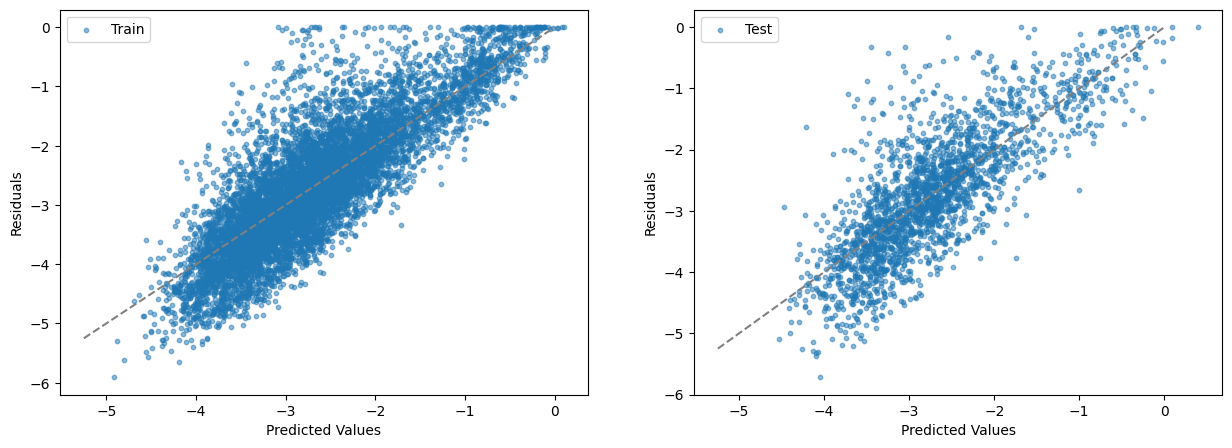

In [ ]:
def evaluate_kernel_ridge_model(X,y):
    """
    trains the most viable model using the lecture data for median engagement prediction to evaluate it using the proposed metrics.

    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels
    """

    X_train, X_test, y_train, y_test = split_processing(X,y)

    hyperparams = {"alpha" : 0.1}

    kernel_params = {"gamma" : 1e-2}

    model = train_kernel_ridge_model(X_train, y_train, hyperparams, gauss_kernel, kernel_params)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = eval_metric_1(y_train, y_train_pred)
    test_rmse = eval_metric_1(y_test, y_test_pred)
    train_r2 = eval_metric_2(y_train, y_train_pred)
    test_r2 = eval_metric_2(y_test, y_test_pred)

    visualize_final_results(1, y_train_pred, y_train,y_test_pred, y_test, [train_rmse],[test_rmse],[train_r2],[test_r2],True)


evaluate_kernel_ridge_model(full_X,full_y)

## Model Evaluation

The kernel model is not overfitting. If the model was overfitting, we would expect to see a very good fit to the training data (low error, high R^2) and a poor fit on the testing data (high error, low R^2). In my case, my ridge model is performing slightly better on the test dataset than the training dataset, in terms of both RMSE and R^2. As seen above, my train dataset had an RMSE of 0.1177 and an R2 of 59.29% whereas my test dataset has an RMSE of 0.1024 and an R2 of 62.32%. While this performance is not optimal (approximately 40% of the variance in the response variable is not explained by my independent variables), these results are satisfactory given the dataset we are working with.

I evaluated my kernel ridge model as well to compare how well the kernel ridge model performs compared to my kernel model. The kernel ridge model exhibits more overfitting, seeing as the model performs better on the training data in this case in terms of R2 (train R2 is 69.73% whereas test R2 is 63.38%). However, the test RMSE actually outperforms the train RMSE slightly (train RMSE is 0.1051 whereas test RMSE is 0.1003). Based on this, I would not conclude that overfitting is an issue in either model. Compared to my previous Ridge model, the addition of the Gaussian kernel appears to have improved my model's performance.

# Ridge Regression From Scratch (Primal Form)

Now, I gradually implement the ridge regression using matrix operations using python. This is intended to connect the mathematical derivations to the actual programmatic realisation of the learning algorithms.

### Dataset

Load in pre-created dataset.

In [ ]:
full_X = pd.read_csv(local_path+"features_seed.csv")
full_y = np.load(local_path+"labels_seed.npy")

In [ ]:
full_X

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606
...,...,...,...,...,...,...
11543,0.014652,0.039166,0.031276,0.040011,0.111862,0.128487
11544,0.027689,0.036021,0.013967,0.048272,0.101936,0.135016
11545,0.015825,0.026280,0.018486,0.036117,0.106924,0.123509
11546,0.005900,0.053097,0.032448,0.050147,0.117994,0.094395


In [ ]:
full_y

array([0.5029234 , 0.01198877, 0.04162666, ..., 0.01257177, 0.99836383,
       0.03274466])

## Transform Data to Matrix Representations

In [ ]:
def prepare_data_for_training(X, y=None):
    """
    returns the matrices that are passed in to the training function of the ridge regression.

    Params:
        X (pandas.DataFrame): Features in the dataset
        y (pandas.DataFrame): Labels in the dataset, Optional

    Returns:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
    """

    X = X.values

    if y is not None:
      if not isinstance(y, np.ndarray):
        y = y.values

    return X, y

In [ ]:
X_, y_ = prepare_data_for_training(full_X, full_y)

## Training and Prediction

In [ ]:
def fit_ridge_reg(X, y, hyperparams):
    """
     Params:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
       _theta (numpy.array): the trained parameters of the model
    """

    # Transpose X
    X_T = X.T

    # Set lambda
    _lambda = hyperparams['lambda']

    # Create diagonal lambda matrix
    D = np.eye(X.shape[1]) * _lambda

    # Calculate theta which minimizes squared error
    _theta = np.linalg.inv(X_T @ X + D) @ X_T @ y

    return _theta

In [ ]:
hyperparams = {
    "lambda": 0.001
}

theta = fit_ridge_reg(X_, y_, hyperparams)

In [ ]:
print("The shape of theta matrix/vector: {} \n\n The values are: \n {}".format(theta.shape, theta))

The shape of theta matrix/vector: (6,) 

 The values are: 
 [-0.05750132  1.01282605  1.60527454  0.03568785  0.72196138 -0.32465819]


In [ ]:
class RidgeRegression():
    def __init__(self, hyperparams):
        """
        instantiates the class

        Params:
            hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value
        """

        self.fitted = False # indicates whether the model is already trained or not

        self.hyperparams = hyperparams


    def fit(self, X, y):
        """
        trains the model given the data. Updates  models internal parameters

        Params:
            X (pandas.DataFrame): Features in the dataset
            y (pandas.DataFrame): Labels in the dataset
        """

        X, y = prepare_data_for_training(X, y)
        self.theta = fit_ridge_reg(X, y, self.hyperparams)
        self.fitted = True


    def predict(self, X):
        """
        makes predictions from given features.
        ! The model should be trained first. Otherwise throws an error.

        Params:
            X (pandas.DataFrame): Features in the dataset
        """

        if not self.fitted:
          raise Exception("Hey! Model not fitted!")

        self.predictions = X @ self.theta

        return self.predictions


In [ ]:
hyperparams = {
    "lambda": 0.001
}

RR = RidgeRegression(hyperparams)

In [ ]:
print("Attributes of the RidgeRegression Instance Before Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance Before Training: 
{'fitted': False, 'hyperparams': {'lambda': 0.001}}


In [ ]:
RR.fit(full_X, full_y)

In [ ]:
print("Attributes of the RidgeRegression Instance After Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance After Training: 
{'fitted': True, 'hyperparams': {'lambda': 0.001}, 'theta': array([-0.05750132,  1.01282605,  1.60527454,  0.03568785,  0.72196138,
       -0.32465819])}


In [ ]:
# Get Predictions

RR.predict(full_X)

,0
0,0.147445
1,0.097451
2,0.128301
3,0.125289
4,0.140865
...,...
11543,0.129507
11544,0.088794
11545,0.093767
11546,0.161858


In [ ]:
# Calculate R2
y_predicted = RR.predict(full_X)
y_actual = full_y

ss_res = np.sum((y_actual - y_predicted) ** 2)
ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
r2 = (1 - ss_res/ss_tot)*100

print(f"R2 Score: {round(r2,2)}%")

R2 Score: 2.33%


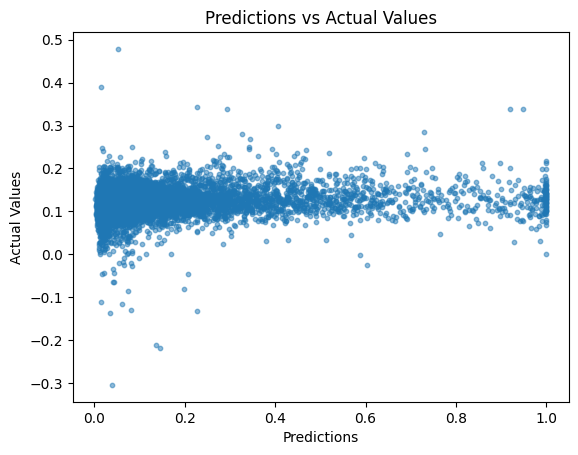

In [ ]:
# Plot predictions vs actual values

plt.scatter(full_y,RR.predictions,alpha=0.5,s=10)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Predictions vs Actual Values')
plt.show()

#### Model Discussion

I chose to explore whether the predictions have a linear correlation with the actual labels using the R2 score and a plot of the actuals versus the predicted. As discussed above, the R2 calculates how strong of a linear relationship there is between the dependent variable and independent variables by calculating how much variance is explained by the model. I chose to use R2 because it is a standard evaluation metric to evalute linear relationships and it is easy to interpret as it is typically on a scale from 0 to 1. I chose to also plot the predictions versus the actual values because it is a straightforward way to visualize how close your predictions are to your true values.

If the model was performing well, we would see the values clustered along the diagonal. We would also see a relatively high R2 value. However, my model is clearly underfitting as the predictions vary significantly from the actual values in the plot. Additionally, my R2 is 2.33%, meaning the independent variables only explain about 2% of the variance in the response variable. This indicates that the dataset in its current form is not able to properly predict the response, and likely needed additional preprocessing.

## Ridge Regression in the Online Learning Setting

In [ ]:
def ridge_reg_loss_derivative(X, y, theta, hyperparams):
    """
    takes data, parameters and hyperparameters to calculate the first derivative of ridge loss

    Params:
        X (numpy.array): a matrix/vector of features
        y (numpy.array): a matrix/vector of labels
        theta (numpy.array): a matrix/vector of parameters being trained
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        derivative (numpy.array): the derivative used for updating the parameters
    """

    _lambda = hyperparams['lambda']
    residual = y - X @ theta
    derivative = -2 * X.T @ residual + 2 * _lambda * theta

    return derivative

In [ ]:
def train_stoch_ridge_reg(X, y, _theta, hyperparams):
    """
    takes data, parameters and hyperparameters and returns the updated parameters
    from training with data

    Params:
        X (numpy.array): a matrix/vector of features
        y (numpy.array): a matrix/vector of labels
        _theta (numpy.array): a matrix/vector of parameters being trained
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        _theta (numpy.array): a matrix/vector of parameters updated after training
    """

    learning_rate = hyperparams['learning_rate']
    gradients = ridge_reg_loss_derivative(X, y, _theta, hyperparams)
    _theta = _theta - learning_rate * gradients

    return _theta


## Train and Monitor Stochastic Ridge Regression Model


In [ ]:
def train_entire_model(X_, y_, hyperparams):
    """
    takes data, hyperparameters and returns the list of losses

    Params:
        X_ (numpy.array): a matrix/vector of features
        y_ (numpy.array): a matrix/vector of labels
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        losses ([float]): list of loss values for each iteration of learning
    """


    n_iters = 2000
    losses = []
    _theta = np.random.normal(0, 1, X_.shape[1])
    _lambda = hyperparams['lambda']
    batch_size = 32

    for i in range(n_iters):
      _theta = train_stoch_ridge_reg(X_, y_, _theta, hyperparams)

      # Train on each batch
      for batch_start in range(0, X_.shape[0], batch_size):
            batch_end = min(batch_start + batch_size, X_.shape[0])
            X_batch = X_[batch_start:batch_end]
            y_batch = y_[batch_start:batch_end]
            _theta = train_stoch_ridge_reg(X_batch, y_batch, _theta, hyperparams)

      # Calculate loss using residual sum of squares over entire dataset
      loss = (y_ - X_ @ _theta).T @ (y_ - X_ @ _theta) + _lambda * _theta.T @ _theta
      losses.append(loss)
      if i % 500 == 0:
        print(f"Iteration {i}: Loss = {round(losses[-1],4)}")
    mse = np.mean((y_ - X_ @ _theta)**2)
    print(f"Final MSE: {round(mse,4)}")

    return losses

In [ ]:
X_, y_ = X_, y_ # Reusing data structures from before

hyperparameters = {
    "lambda" : 0.1,
    "learning_rate" :  1e-6
}

losses = train_entire_model(X_, y_, hyperparameters)

Iteration 0: Loss = 370.5821
Iteration 500: Loss = 346.9612
Iteration 1000: Loss = 342.1786
Iteration 1500: Loss = 340.7484
Final MSE: 0.0294


- Implement the `visualise_loss_values` function to use the appropriate visualisations to plot the loss values in a meaningful way.
- The function does not have to return anything. Display the visualisation as a step within the implemented function.

In [ ]:
def visualise_loss_values(loss_values):
    """
    takes relevant loss values and plots the loss values in the dataset over the iterations (epochs).

    Params:
        loss_values (dict): a dictionary that contains the loss values where key is the loss type
                            and values are the loss values.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(loss_values)
    plt.xlabel('Iterations')
    plt.ylabel('Loss (Residual Sum of Squares)')
    plt.title('Loss vs Iterations')
    plt.show()

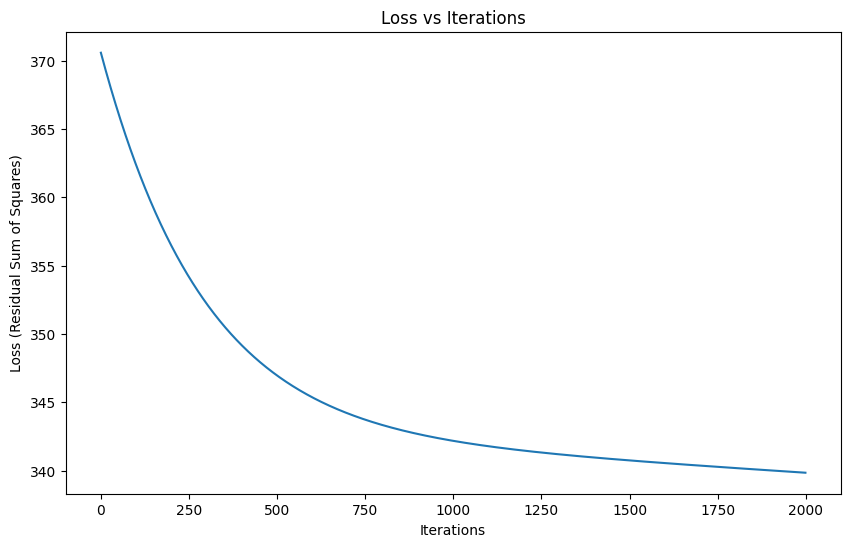

In [ ]:
visualise_loss_values(losses)

Learning Rate: 1e-09
Iteration 0: Loss = 449.3096
Iteration 200: Loss = 449.238
Iteration 400: Loss = 449.1665
Iteration 600: Loss = 449.095
Iteration 800: Loss = 449.0235
Iteration 1000: Loss = 448.9521
Iteration 1200: Loss = 448.8807
Iteration 1400: Loss = 448.8094
Iteration 1600: Loss = 448.7381
Iteration 1800: Loss = 448.6669
Final MSE: 0.0388
Learning Rate: 1e-08
Iteration 0: Loss = 437.4292
Iteration 200: Loss = 436.8418
Iteration 400: Loss = 436.258
Iteration 600: Loss = 435.6779
Iteration 800: Loss = 435.1014
Iteration 1000: Loss = 434.5284
Iteration 1200: Loss = 433.959
Iteration 1400: Loss = 433.3931
Iteration 1600: Loss = 432.8308
Iteration 1800: Loss = 432.2719
Final MSE: 0.0374
Learning Rate: 1e-07
Iteration 0: Loss = 805.915
Iteration 200: Loss = 779.6594
Iteration 400: Loss = 755.0525
Iteration 600: Loss = 731.9907
Iteration 800: Loss = 710.377
Iteration 1000: Loss = 690.1201
Iteration 1200: Loss = 671.1348
Iteration 1400: Loss = 653.341
Iteration 1600: Loss = 636.6639
I

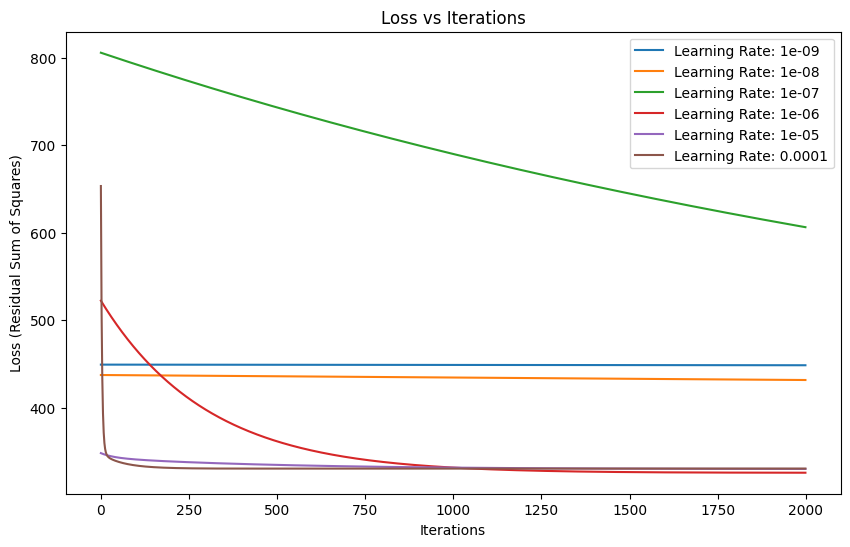

In [ ]:
# Train model over a range of learning rates

plt.figure(figsize=(10, 6))

learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]

for learning_rate in learning_rates:

  hyperparameters = {
    "lambda" : 0.1,
    "learning_rate" : learning_rate
  }
  print(f"Learning Rate: {learning_rate}")
  losses = train_entire_model(X_, y_, hyperparameters)
  plt.plot(losses,label=f'Learning Rate: {learning_rate}')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss (Residual Sum of Squares)')
plt.title('Loss vs Iterations')
plt.show()

Lambda: 0.0001
Iteration 0: Loss = 667.7979
Iteration 500: Loss = 323.5055
Iteration 1000: Loss = 323.4601
Iteration 1500: Loss = 323.4171
Final MSE: 0.028
Lambda: 0.001
Iteration 0: Loss = 458.2241
Iteration 500: Loss = 340.3167
Iteration 1000: Loss = 336.8006
Iteration 1500: Loss = 334.3054
Final MSE: 0.0288
Lambda: 0.01
Iteration 0: Loss = 1348.5498
Iteration 500: Loss = 352.8924
Iteration 1000: Loss = 345.6547
Iteration 1500: Loss = 340.6014
Final MSE: 0.0292
Lambda: 0.1
Iteration 0: Loss = 791.7338
Iteration 500: Loss = 355.7817
Iteration 1000: Loss = 343.7267
Iteration 1500: Loss = 337.7937
Final MSE: 0.029
Lambda: 1
Iteration 0: Loss = 1758.5725
Iteration 500: Loss = 352.565
Iteration 1000: Loss = 352.4734
Iteration 1500: Loss = 352.472
Final MSE: 0.0305
Lambda: 10
Iteration 0: Loss = 369.3248
Iteration 500: Loss = 448.0324
Iteration 1000: Loss = 448.0324
Iteration 1500: Loss = 448.0324
Final MSE: 0.0388


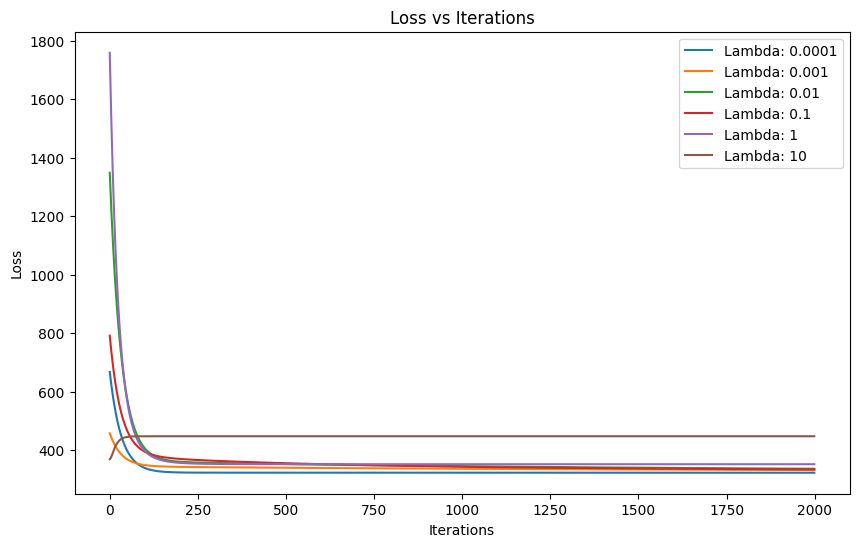

In [ ]:
# Train model over a range of lambdas

plt.figure(figsize=(10, 6))

_lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for _lambda in _lambdas:

  hyperparameters = {
    "lambda" : _lambda,
    "learning_rate" : 1e-05
  }
  print(f"Lambda: {_lambda}")
  losses = train_entire_model(X_, y_, hyperparameters)
  plt.plot(losses, label=f'Lambda: {_lambda}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.show()

In my initial model with lambda 0.1 and learning rate 1e-6 (as suggested in the hint), the loss (residual sum of squares) does decrease over time and converge to approximately 340 with a MSE of 0.0294. This indicates that the model is learning over each iteration because it is iteratively updating the weights using the gradient of the loss function with respect to the model's parameters. Since we do not perform a train-test split in this section, it is not clear whether or not there is overfitting.

Next, I test a range of learning rates (1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4). There are varying effects for each learning rate in the range. When the learning rate is too small (<1e-7), the training does not progress most likely due to vanishing gradients (see flat curves above). In contrast, when the learning rate gets larger, the learning process converges much faster leading to L-shaped curves that find the minimum very quickly (see the L-shaped curve for learning rate 1e-4). While this happened to find the apparent global minimum in my experiment, in general too large of a learning rate can cause exploding gradients and unstable learning.

Finally, I test a range of regularization factors. Across the range of lambdas I tested (0.0001, 0.001, 0.01, 0.1, 1, 10), the majority converge to roughly the same loss value (approximately 350). The exception is lambda 10, where the loss actually increased over iterations and converged to a value above 400. My hypothesis for why this occurred is that the regularization factor of 10 was penalizing the model's larger coefficents too heavily, limiting the model's ability to learn properly and find optimal weights. As to the variation in the learning curve shapes between the other lambdas, the increase in lambda in general appeared to cause the model to start with higher loss but have a steeper/faster decrease in loss over iterations (see the curve for lambda 1). My hypothesis for this is that the higher regularization term is decreasing the coefficients of the less important factors at a faster rate so the learning converges quickly.

Altogether, it is clear that the selection of learning rate and regularization factors greatly impacts learning and ought to be tested before choosing a final model.
